# Step-by-step Tutorial

This tutorial demonstrates how to use the UXsim package to simulate traffic scenarios and analyze the results using Python in a Jupyter Notebook environment.

In [18]:
%matplotlib inline

## Simple Scenario Example

First, import the required module.

In [19]:
from uxsim import *

### Scenario Definition

First, we will define the main simulation world `W`.
The simulation scenario is defined by creating an object of the [World](https://toruseo.jp/UXsim/docs/_autosummary/uxsim.World.html) class, which represents the main simulation environment. 
The constructor takes several parameters. 
The unit of time is s (seconds) and the unit of length is m (meters).

- `name`: A string specifying the name of the scenario. This is used as the folder name for saving results. It can be left blank.
- `deltan`: An integer specifying the simulation aggregation unit Δn, which defines how many vehicles are grouped together (i.e., platoon size) for computation.
- `tmax`: An integer specifying the total simulation time in seconds.
- `print_mode`: An integer (0 or 1) determining whether to print information during the simulation. Usually set to 1, but recommended 0 when running multiple simulations automatically.
- `save_mode`: An integer (0 or 1) determining if visualization results are saved.
- `show_mode`: An integer (0 or 1) determining if visualization results are displayed. It's good to set show_mode=1 in Jupyter Notebook, otherwise recommended 0.
- `random_seed`: A random seed for reproducible experiments. Set to None for non-deterministic behavior.

In [20]:
W = World(
    name="simple_demo",    # Scenario name. Can be blank. Used as the folder name for saving results.
    deltan=5,   # Simulation aggregation unit Δn. Defines how many vehicles are grouped together (i.e., platoon size) for computation. Computation cost is generally inversely proportional to deltan^2.
    tmax=1200,  # Total simulation time (s)
    print_mode=1, save_mode=1, show_mode=1,    # Various options. print_mode determines whether to print information. Usually set to 1, but recommended 0 when running multiple simulations automatically. save_mode determines if visualization results are saved. show_mode determines if visualization results are displayed. It's good to set show_mode=1 on Jupyter Notebook, otherwise recommended 0.
    random_seed=0    # Set the random seed. Specify if you want repeatable experiments. If not, set to None. 
)

Next, the nodes and links of the network are defined using the [addNode](https://toruseo.jp/UXsim/docs/_autosummary/uxsim.World.html#uxsim.World.addNode) (to add [Node](https://toruseo.jp/UXsim/docs/_autosummary/uxsim.Node.html#uxsim.Node) object) and [addLink](https://toruseo.jp/UXsim/docs/_autosummary/uxsim.World.html#uxsim.World.addLink) (to add [Link](https://toruseo.jp/UXsim/docs/_autosummary/uxsim.Link.html#uxsim.Link) object) methods of the World object.
The addNode method requires the following parameters:

- `name`: A string specifying the name of the node.
- `x`: A float specifying the x-coordinate of the node for visualization purposes.
- `y`: A float specifying the y-coordinate of the node for visualization purposes.

The addLink method requires the following parameters (some of them are optional though):

- `name`: A string specifying the name of the link.
- `start_node`: A string specifying the name of the start node. You can also specify Node object instead.
- `end_node`: A string specifying the name of the end node. You can also specify Node object instead.
- `length`: A float specifying the length of the link.
- `free_flow_speed`: A float specifying the free flow speed of the link.
- `number_of_lanes`: An integer specifying the number of lanes of the link.
- `merge_priority`: A float specifying the merge priority of the link during merging.

In [21]:
W.addNode("orig1", 0, 0) #Create a node. Parameters: node name, visualization x-coordinate, visualization y-coordinate
W.addNode("orig2", 0, 2)
W.addNode("merge", 1, 1)
W.addNode("dest", 2, 1)

W.addLink("link1", "orig1", "merge", length=1000, free_flow_speed=20, number_of_lanes=1, merge_priority=0.5) # Create a link. Parameters: link name, start node, end node, length, free_flow_speed, number of lanes, merge_priority during merging
W.addLink("link2", "orig2", "merge", length=1000, free_flow_speed=20, number_of_lanes=1, merge_priority=2)
W.addLink("link3", "merge", "dest", length=1000, free_flow_speed=20, number_of_lanes=1)

<Link link3>

Finally, the traffic demand between origin-destination (OD) pairs is specified using the [adddemand](https://toruseo.jp/UXsim/docs/_autosummary/uxsim.World.html#uxsim.World.adddemand) method, which add appropriate number of [Vehicle](https://toruseo.jp/UXsim/docs/_autosummary/uxsim.Vehicle.html) objects.
It requires the following parameters:

- `orig`: A string specifying the name of the origin node. You can also specify Node object instead.
- `dest`: A string specifying the name of the destination node. You can also specify Node object instead.
- `t_start`: A float specifying the start time of the demand in seconds.
- `t_end`: A float specifying the end time of the demand in seconds.
- `flow`: A float specifying the demand flow rate in vehicles per second.

In [22]:
W.adddemand("orig1", "dest", 0, 1000, 0.4) # Create OD traffic demand. Parameters: origin node, destination node, start time, end time, demand flow rate
W.adddemand("orig2", "dest", 500, 1000, 0.6)

You can check the network shape by using `W.show_network()` (Note that the plot uses left-handed traffic rule). This scenario is a simple Y-shaped network. It may cause traffic congestion due to merging.

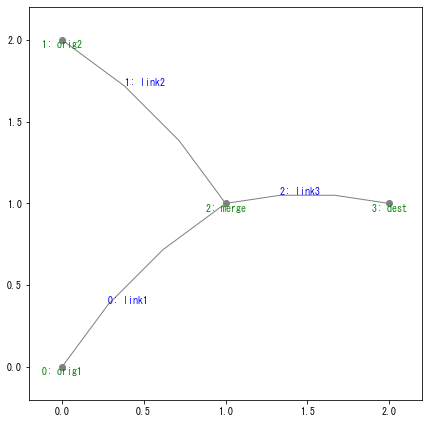

In [23]:
W.show_network()

### Simulation Execution

Once the scenario is defined, the simulation can be executed by calling the `exec_simulation` method of the `World` object.
It first show the summary of the simulation setting, the following information is printed during the simulation to see the progress:

- Current simulation time
- Number of vehicles in the network
- Average speed of vehicles
- Computation time taken for the simulation steps so far

In [24]:
W.exec_simulation()

simulation setting:
 scenario name: simple_demo
 simulation duration:	 1200 s
 number of vehicles:	 700 veh
 total road length:	 3000 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 240
 number of platoons:	 140
 number of links:	 3
 number of nodes:	 4
 setup time:		 2.55 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
     600 s|      100 vehs|  17.5 m/s|     0.08 s
    1200 s|       25 vehs|  20.0 m/s|     0.16 s
 simulation finished


1

The simulation can also be run in steps by specifying the `duration_t` parameter of `exec_simulation`. This allows intervening in the simulation at intermediate points. This is for advantage usage.
For example:

```python
while W.check_simulation_ongoing():
    W.exec_simulation(duration_t=100)
    your_intervention_method()
```

### Results Analysis

The [Analyzer](https://toruseo.jp/UXsim/docs/_autosummary/uxsim.analyzer.Analyzer.html) class accessible as `W.analyzer` is responsible for analyzing the results.

A summary of the results can be printed below. Delay ratio is the ratio of delay time to total trip time, with a value close to zero indicating smooth traffic (when the shortest route can be traveled without congestion) and a larger value indicating congestion (when the shortest route is bypassed or congested).

In [25]:
W.analyzer.print_simple_stats()

results:
 average speed:	 13.8 m/s
 number of completed trips:	 675 / 700
 average travel time of trips:	 142.7 s
 average delay of trips:	 42.7 s
 delay ratio:			 0.299
 total distance traveled:	 1416875.0 m


Simulation results can be output as `pandas.DataFrame` objects by using the following functions. Note that the value `-1` basically means undefined (e.g., headway when there is no vehicle in front).

In [26]:
#overall
df = W.analyzer.basic_to_pandas()
display(df)

#OD-specific traffic situation
df = W.analyzer.od_to_pandas()
display(df)

#MFD
df = W.analyzer.mfd_to_pandas()
display(df)

#link-level
df = W.analyzer.link_to_pandas()
display(df)

#within link
df = W.analyzer.link_traffic_state_to_pandas()
display(df)

#vehicle-level
df = W.analyzer.vehicles_to_pandas()
display(df)

total_trips  completed_trips  total_travel_time  average_travel_time  \
0          700              675            96325.0           142.703704   

   total_delay  average_delay  
0      28825.0      42.703704

orig  dest  total_trips  completed_trips  free_travel_time  \
0  orig1  dest          400              375             100.0   
1  orig2  dest          300              300             100.0   

   average_travel_time  stddiv_travel_time  shortest_distance  \
0           167.666667           89.388043             2000.0   
1           111.500000            5.188127             2000.0   

   average_distance_traveled_per_veh  stddiv_distance_traveled_per_veh  
0                          2042.1875                         169.26282  
1                          2000.0000                           0.00000

t  network_k  network_q
0  0   0.006944   0.138889

link start_node end_node  traffic_volume  vehicles_remain  \
0  link1      orig1    merge             400                0   
1  link2      orig2    merge             300                0   
2  link3      merge     dest             675               25   

   free_travel_time  average_travel_time  stddiv_travel_time  length  
0              50.0           128.125000           82.211776    1000  
1              50.0            55.208333            5.548868    1000  
2              50.0            52.166667            2.477678    1000

link     t      x  delta_t  delta_x         q         k     v
0    link1     0    0.0      120    100.0  0.375000  0.018750  20.0
1    link1     0  100.0      120    100.0  0.333333  0.016667  20.0
2    link1     0  200.0      120    100.0  0.333333  0.016667  20.0
3    link1     0  300.0      120    100.0  0.333333  0.016667  20.0
4    link1     0  400.0      120    100.0  0.291667  0.014583  20.0
..     ...   ...    ...      ...      ...       ...       ...   ...
295  link3  1080  500.0      120    100.0  0.770833  0.038542  20.0
296  link3  1080  600.0      120    100.0  0.770833  0.038542  20.0
297  link3  1080  700.0      120    100.0  0.760417  0.038021  20.0
298  link3  1080  800.0      120    100.0  0.760417  0.038021  20.0
299  link3  1080  900.0      120    100.0  0.791667  0.039583  20.0

[300 rows x 8 columns]

name  dn   orig  dest     t      link      x      s     v
0       0   5  orig1  dest    15     link1    0.0   -1.0  20.0
1       0   5  orig1  dest    20     link1  100.0   -1.0  20.0
2       0   5  orig1  dest    25     link1  200.0   -1.0  20.0
3       0   5  orig1  dest    30     link1  300.0   -1.0  20.0
4       0   5  orig1  dest    35     link1  400.0   -1.0  20.0
...   ...  ..    ...   ...   ...       ...    ...    ...   ...
4207  139   5  orig2  dest  1090     link3  600.0  225.0  20.0
4208  139   5  orig2  dest  1095     link3  700.0  225.0  20.0
4209  139   5  orig2  dest  1100     link3  800.0   -1.0  20.0
4210  139   5  orig2  dest  1105     link3  900.0   -1.0  20.0
4211  139   5  orig2  dest  1105  trip_end   -1.0   -1.0  -1.0

[4212 rows x 9 columns]

You can also save these results to CSV using

In [27]:
W.analyzer.output_data()

### Visualization of Results

Several visualization methods are provided to confirm the simulation results.

#### Link-level

Time-space diagrams (density and trajectories) of a link can be plotted as follows.
Ones for consecutive links can also be plotted.

 drawing traffic states...


  0%|          | 0/1 [00:00<?, ?it/s]

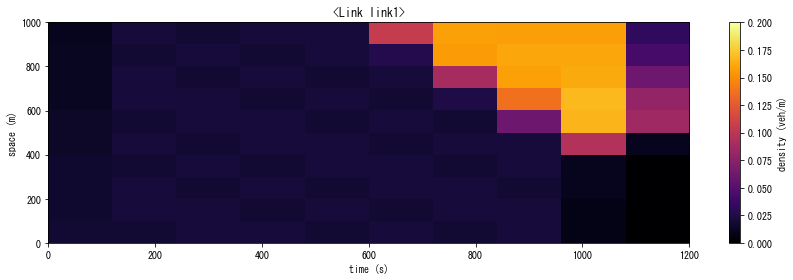

 drawing trajectories...


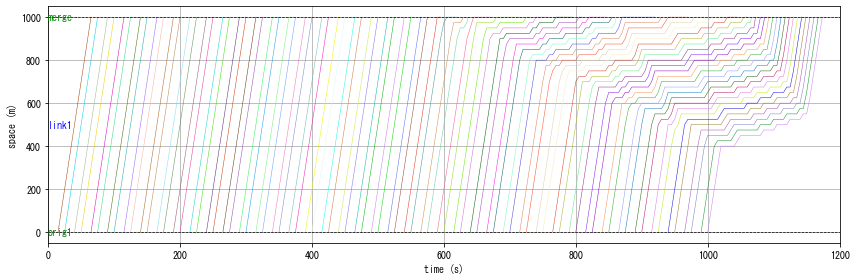

 drawing trajectories...


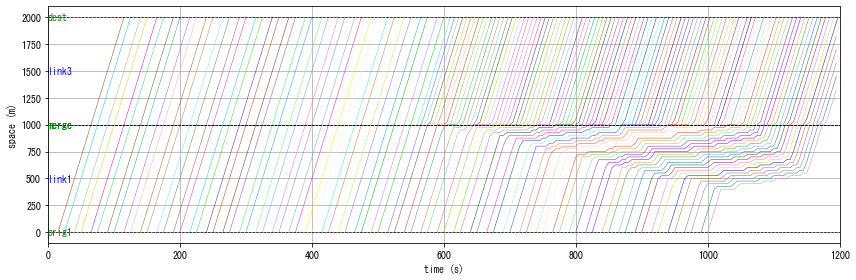

In [28]:
W.analyzer.time_space_diagram_density("link1")
W.analyzer.time_space_diagram_traj("link1")

W.analyzer.time_space_diagram_traj_links([["link1", "link3"]])

Cumulative curves (with actual/instantaneous travel times) can be plotted by using

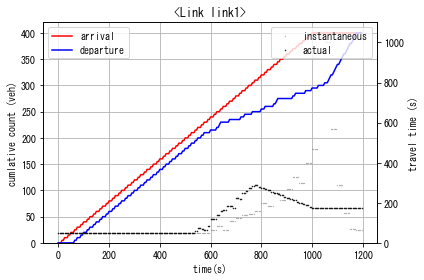

In [29]:
W.analyzer.cumulative_curves(["link1"])

#### Network/Area-level

Network traffic states can be visualized by number of ways:

- `W.analyzer.network(t, detailed=0)`: Snapshots of link-average traffic states on time `t`
- `W.analyzer.network(t, detailed=1)`: Snapshots of segment-level traffic states on time `t`
- `W.analyzer.network_average()`: Time-averaged link state over the entire simulation period
- `W.analyzer.network_anim()`: Dynamic animation of network traffic states
- `W.analyzer.network_fancy()`: Dynamic animation of vehicle trajectories in network

By default, you can visualize the traffic situation per link, the traffic situation per segment within a link (not very clear depending on the network geometry), and the movement trajectory of some vehicles.
The thicker the width of the link, the greater the number and density of vehicles, and the darker the color, the lower the speed.
Note that the animation generation speed for large scenarios could take some time.

Since dynamic network traffic flow is a complicated spatial-temporal phenomenon, its visualization is not very easy. Please choose appropriate styles depending on your purposes.

Note also that this example uses left-handed traffic rule (e.g., Japan, UK). If you want to use right-handed one, you need to specify option `left_handed=0`.

snapshots


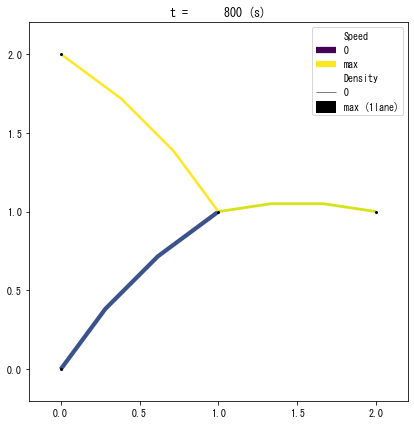

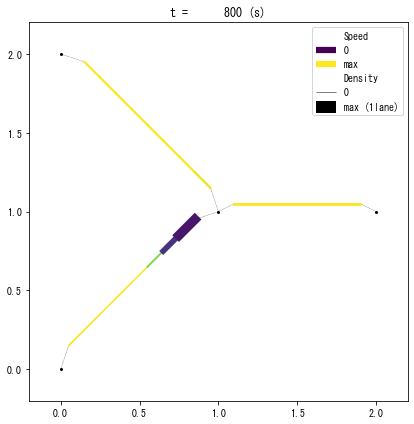

average of entire simulation period


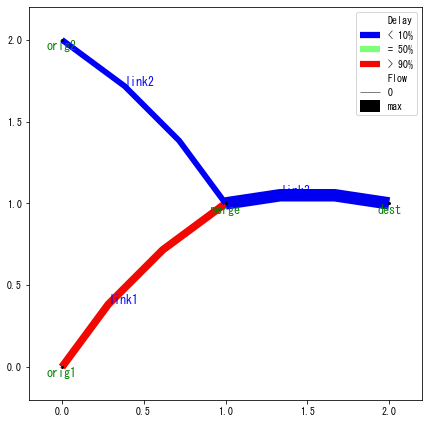

In [30]:
print("snapshots")
W.analyzer.network(800, detailed=0, network_font_size=0, figsize=(6,6))
W.analyzer.network(800, detailed=1, network_font_size=0, figsize=(6,6))

print("average of entire simulation period")
W.analyzer.network_average()

 generating animation...


  0%|          | 0/8 [00:00<?, ?it/s]

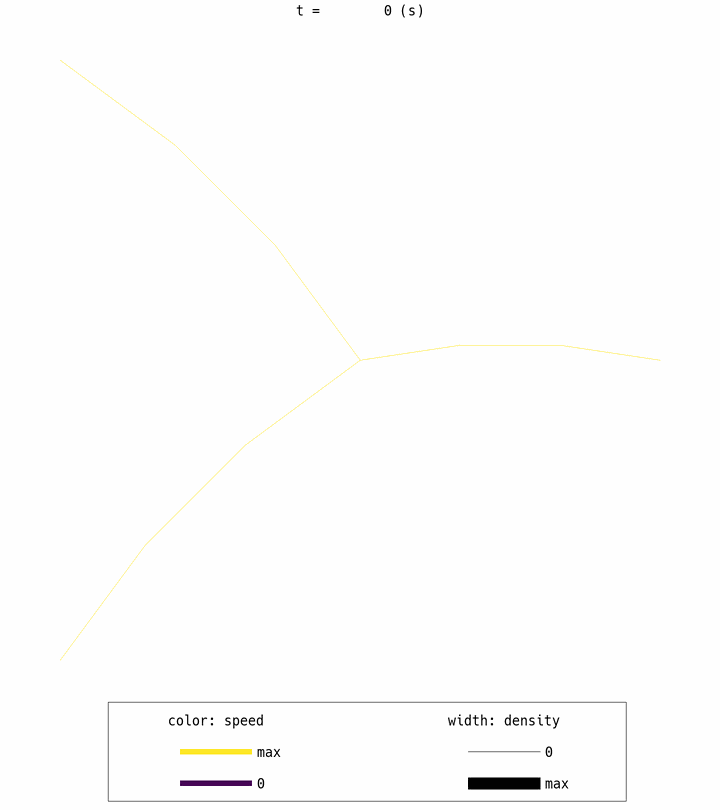

 generating animation...


  0%|          | 0/10 [00:00<?, ?it/s]

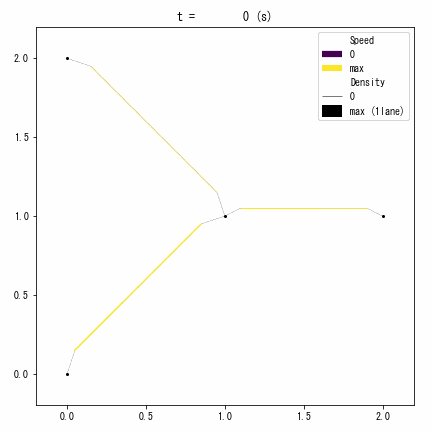

 generating animation...


  0%|          | 0/120 [00:00<?, ?it/s]

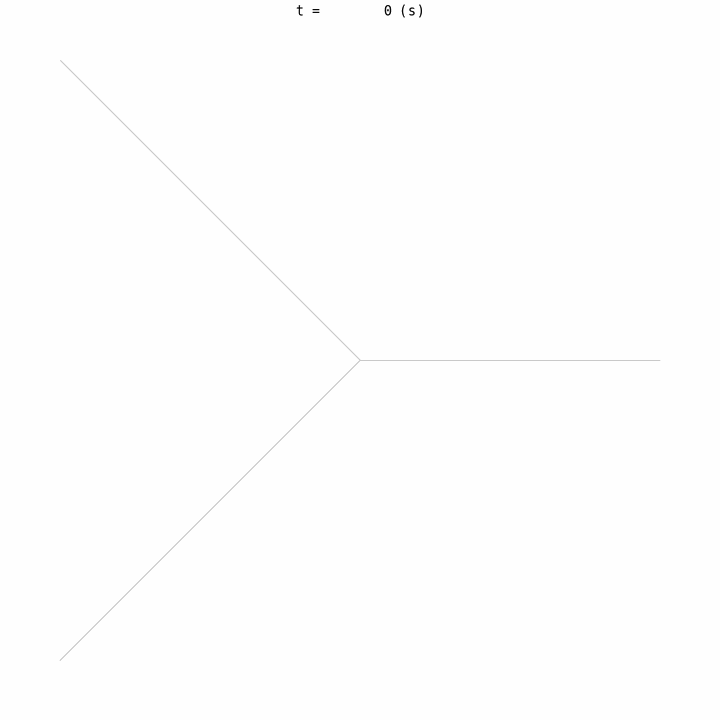

In [31]:
W.analyzer.network_anim(animation_speed_inverse=15, timestep_skip=30, detailed=0, figsize=(6,6), network_font_size=0)
from IPython.display import display, Image
with open("outsimple_demo/anim_network0.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))
    
W.analyzer.network_anim(detailed=1, figsize=(6,6), network_font_size=0)

with open("outsimple_demo/anim_network1.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

W.analyzer.network_fancy(animation_speed_inverse=15, sample_ratio=0.3, interval=3, trace_length=3, network_font_size=0)

with open("outsimple_demo/anim_network_fancy.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))
    

MFD (Macroscopic fundamental diagram), which summarizes the whole network states, can also be plotted by using

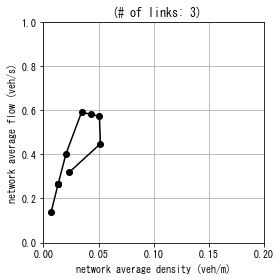

In [32]:
W.analyzer.macroscopic_fundamental_diagram()

## Sioux Falls Network

The tutorial concludes with a larger example applying the package to simulate the well-known Sioux Falls network, often used as a benchmark in transportation research.

The most frequently used functions would be those of [World](https://toruseo.jp/UXsim/docs/_autosummary/uxsim.World.html) (to define simulation scenarios) and [Analyzer](https://toruseo.jp/UXsim/docs/_autosummary/uxsim.analyzer.Analyzer.html) (to analyze simulation results). For the details, please refer to the technical reference: https://toruseo.jp/UXsim/docs/tech_ref.html.

In [33]:
# Simulation main
W = World(
    name="simple_demo",
    deltan=5,
    tmax=7200,
    print_mode=1, save_mode=1, show_mode=0,
    random_seed=0
)

# Scenario definition
W.load_scenario("dat/sfnetwork.uxsim_scenario")

# Simulation execution
W.exec_simulation()

# Results analysis
W.analyzer.print_simple_stats()

loading scenario from 'dat/sfnetwork.uxsim_scenario'
 DATA SOURCE AND LICENCE : Sioux Falls network. This is based on https://github.com/bstabler/TransportationNetworks/tree/master/SiouxFalls by Transportation Networks for Research Core Team. Users need to follow their licence. Especially, this data is for academic research purposes only, and users must indicate the source of any dataset they are using in any publication that relies on any of the datasets provided in this web site.
 Number of loaded nodes: 24
 Number of loaded links: 76
 Number of loaded `adddemand`s: 1056
simulation setting:
 scenario name: simple_demo
 simulation duration:	 7200 s
 number of vehicles:	 34690 veh
 total road length:	 314000.0 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 1440
 number of platoons:	 6938
 number of links:	 76
 number of nodes:	 24
 setup time:		 0.40 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s| 

 generating animation...


  0%|          | 0/180 [00:00<?, ?it/s]

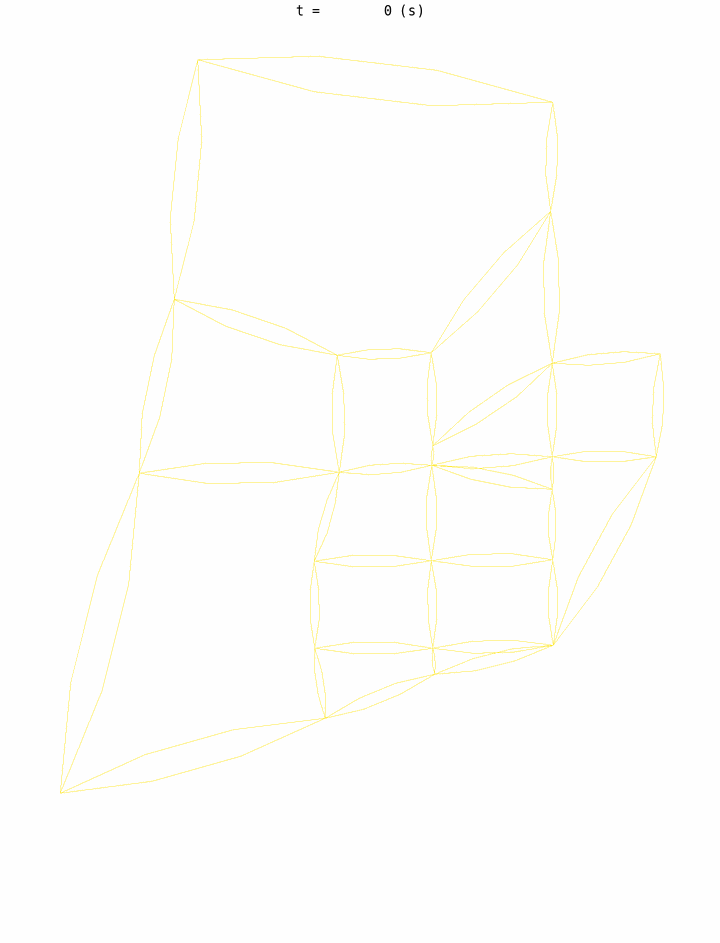

In [34]:
W.analyzer.network_anim(animation_speed_inverse=15, timestep_skip=8, detailed=0, network_font_size=0)
with open("outsimple_demo/anim_network0.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))